In [120]:
import pandas as pd
a="E:/DA_Projects/2/Customers.csv"
b="E:/DA_Projects/2/Transactions.csv"
customers = pd.read_csv(a)
transactions = pd.read_csv(b)

print(customers.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067      25-08-2024         1      300.68   
1        T00112      C0146      P067      27-05-2024         1      300.68   
2        T00166      C0127      P067      25-04-2024         1      300.68   
3        T00272      C0087      P067      26-03-2024         2      601.36   
4        T00363      C0070      P067      21-03-2024         3      902.04   

    Price  
0  300.68  
1  300.68  
2  300.68  
3  300.68  
4  300.68  


In [121]:
a = "E:/DA_Projects/2/Customers.csv"
b = "E:/DA_Projects/2/Transactions.csv"
customers = pd.read_csv(a)
transactions = pd.read_csv(b)
print(customers.head())
print(transactions.head())
merged_df = pd.merge(customers, transactions, on="CustomerID", how="inner")
merged_df.to_csv("E:/DA_Projects/2/cluster.csv", index=False)

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID TransactionDate  Quantity  TotalValue  \
0        T00001      C0199      P067      25-08-2024         1      300.68   
1        T00112      C0146      P067      27-05-2024         1      300.68   
2        T00166      C0127      P067      25-04-2024         1      300.68   
3        T00272      C0087      P067      26-03-2024         2      601.36   
4        T00363      C0070      P067      21-03-2024         3      902.04   

    Price  
0  300.68  
1  300.68  
2  300.68  
3  300.68  
4  300.68  


In [122]:
c="E:/DA_Projects/2/cluster.csv"
cluster = pd.read_csv(c)
print(customers.head())
print("Basic Info:")
print(df.info())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   CustomerID       1000 non-null   object        
 1   CustomerName     1000 non-null   object        
 2   Region           1000 non-null   object        
 3   SignupDate       1000 non-null   datetime64[ns]
 4   TransactionID    1000 non-null   object        
 5   ProductID        1000 non-null   object        
 6   TransactionDate  1000 non-null   datetime64[ns]
 7   Quantity         1000 non-null   int64  

In [123]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
df = pd.read_csv(c) 
df["SignupDate"] = pd.to_datetime(df["SignupDate"])
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

df["DaysSinceSignup"] = (df["TransactionDate"] - df["SignupDate"]).dt.days

customer_data = df.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalValue": "sum",
    "DaysSinceSignup": "mean"
}).reset_index()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data.iloc[:, 1:])  # Exclude CustomerID
kmeans = KMeans(n_clusters=3, random_state=42)
customer_data["Cluster"] = kmeans.fit_predict(X_scaled)
print(customer_data.head())


  CustomerID  Quantity  TotalValue  DaysSinceSignup  Cluster
0      C0001        12     3354.52            684.2        0
1      C0002        10     1862.74            882.0        0
2      C0003        14     2725.38             63.0        2
3      C0004        23     5354.88            675.0        1
4      C0005         7     2034.24            604.0        0


C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\1070868925.py:7: UserWarning: Parsing '19-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\1070868925.py:7: UserWarning: Parsing '17-09-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\1070868925.py:7: UserWarning: Parsing '28-02-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\1070868925.py:7: UserWarning: Parsing '16-06-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Tr

In [124]:
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA

df = pd.read_csv(c) 

df["SignupDate"] = pd.to_datetime(df["SignupDate"])
df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])

df["DaysSinceSignup"] = (df["TransactionDate"] - df["SignupDate"]).dt.days

customer_data = df.groupby("CustomerID").agg({
    "Quantity": "sum",
    "TotalValue": "sum",
    "DaysSinceSignup": "mean"
}).reset_index()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(customer_data.iloc[:, 1:])


C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\519524443.py:7: UserWarning: Parsing '19-01-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\519524443.py:7: UserWarning: Parsing '17-09-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\519524443.py:7: UserWarning: Parsing '28-02-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["TransactionDate"] = pd.to_datetime(df["TransactionDate"])
C:\Users\mayan\AppData\Local\Temp\ipykernel_18564\519524443.py:7: UserWarning: Parsing '16-06-2024' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df["Transa

Davies-Bouldin Index: 0.8390


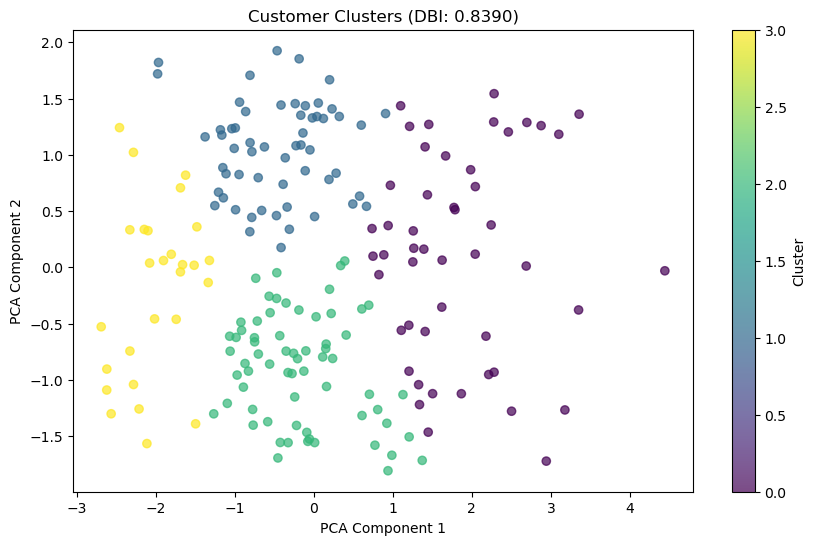

In [125]:
# Apply K-Means Clustering
k = 4 
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
customer_data["Cluster"] = kmeans.fit_predict(X_scaled)

dbi_score = davies_bouldin_score(X_scaled, customer_data["Cluster"])
print(f"Davies-Bouldin Index: {dbi_score:.4f}")

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=customer_data["Cluster"], cmap='viridis', alpha=0.7)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title(f"Customer Clusters (DBI: {dbi_score:.4f})")
plt.colorbar(label="Cluster")
plt.show()